# Projecting Population Growth

In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 5.8 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

Here's the data from the previous chapters, one last time.

In [4]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [5]:
from pandas import read_html

filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [6]:
un = table2.un / 1e9
census = table2.census / 1e9

And here are the functions from the previous chapter.

In [7]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap06.py')

Downloaded chap06.py


In [21]:
from chap06 import run_simulation

def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billions)')

In the previous chapter we developed a quadratic model of world
population growth from 1950 to 2016. It is a simple model, but it fits
the data well and the mechanisms it's based on are plausible.

In this chapter we'll use the quadratic model to generate projections of future growth, and compare our results to projections from actual
demographers.

## Generating Projections

Let's run the quadratic model, extending the results until 2100, and see how our projections compare to the professionals'.

Here's the quadratic growth function again.

In [9]:
def growth_func_quad(t, pop, system):
    return system.alpha * pop + system.beta * pop**2

And here are the system parameters.

In [10]:
t_0 = census.index[0]
p_0 = census[t_0]

system = System(t_0 = t_0,
                p_0 = p_0,
                alpha = 25 / 1000,
                beta = -1.8 / 1000,
                t_end = 2100)

With `t_end=2100`, we can generate the projection by calling `run_simulation` the usual way.

In [11]:
results = run_simulation(system, growth_func_quad)

Here are the last few values in the results.

In [12]:
show(results.tail())

,Quantity
Time,
2096,12.462519
2097,12.494516
2098,12.525875
2099,12.556607
2100,12.586719


Here's what the results look like.

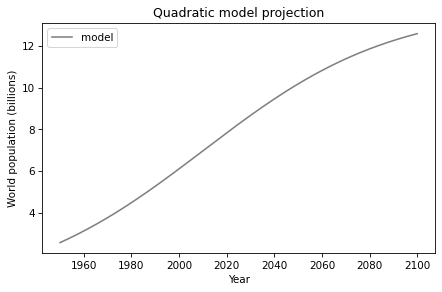

In [13]:
results.plot(color='gray', label='model')
decorate(xlabel='Year',
         ylabel='World population (billions)',
         title='Quadratic model projection')

In [14]:
table3 = tables[3]

The column names are long strings; for convenience, I'll replace them with abbreviations.

In [15]:
table3.columns = ['census', 'prb', 'un']

Here are the first few rows:

In [16]:
table3.head()

,census,prb,un
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


Some values are `NaN`, which indicates missing data, because some organizations did not publish projections for some years.
The following function plots projections from the U.N. DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

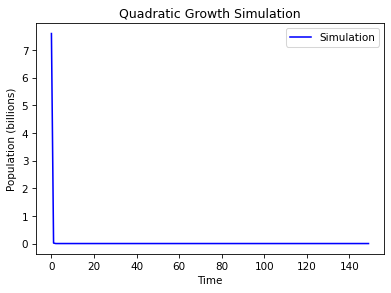

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function for quadratic growth
def growth_func_quad(t, pop, alpha, beta):
    return alpha * pop + beta * pop**2

# Function to run the simulation
def run_simulation(timesteps, alpha, beta, initial_population):
    time = np.arange(timesteps)
    population = np.zeros(timesteps)

    population[0] = initial_population

    for t in range(1, timesteps):
        population[t] = growth_func_quad(t, population[t-1], alpha, beta)

    return pd.DataFrame(data={'Time': time, 'Population': population})

# Set parameters for the simulation
timesteps = 150
alpha = 0.0025
beta = -0.00002
initial_population = 7.6  # Initial population in billions

# Run the simulation
simulation_results = run_simulation(timesteps, alpha, beta, initial_population)

# Plot the results
plt.plot(simulation_results['Time'], simulation_results['Population'], label='Simulation', color='blue')
plt.xlabel('Time')
plt.ylabel('Population (billions)')
plt.title('Quadratic Growth Simulation')
plt.legend()
plt.show()
